<a href="https://colab.research.google.com/github/Harshpatel44/MNIST-dataset/blob/master/Final%20Copy%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics.pairwise import euclidean_distances

a) Creating data set

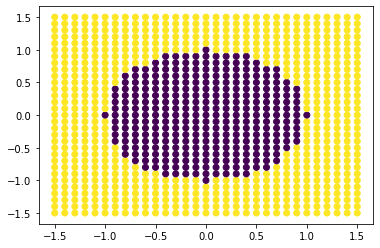

In [2]:
def data_creation(x0,y0,points,p):
    values = np.linspace(x0,y0,points)  # spacing is 0.1, hence 31
    X1, X2 = np.meshgrid(values,values)
    X = np.array([X1.flatten(), X2.flatten()]).T
    y = np.zeros((X.shape[0]), dtype='int32')

    # generating classes
    for i in range(0, X.shape[0]):
        if (np.linalg.norm([X[i][0], X[i][1]], p) <= 1):
            y[i] = 1
        else:
            y[i] = 2
    #plotting
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()
    return X,y
X,y=data_creation(-1.5,1.5,31,2)

b) KNN algorithm

In [0]:
class KNN:
    def __init__(self, k, num_classes):
        self.num_classes = num_classes
        self.k = k
        self.parameters = None

    def train(self, training_data, training_labels):

        self.X=np.array(training_data,dtype='float32')
        self.y= training_labels
        self.parameters = None
        pass

    def get_k(self):
      return self.k

    def set_k(self,k):
      self.k=k

    def predict(self, data):
        data=np.array(data)
        e=euclidean_distances(self.X, data).T      #finding euclidian distances between training data and testing data
        def axis_sorting(e):
            index=np.argpartition(e,self.k)
            e=np.array(self.y[index[:self.k]])
            return e
        def label_values(e):
            return np.argmax(np.bincount(e))
        e=np.apply_along_axis(axis_sorting,1,e)    # sorting the euclidian distances and fetching nearest one's yth label.
        e=np.apply_along_axis(label_values,1,e)    # finding the label which has occured maximum timees.( which is predicted values)
        return e
        
    def accuracy(self, predic_list, labels):
        count=0
        for i,j in zip(predic_list,labels):
            if(i==j):
                count+=1
        return count/len(labels)

    


Running the model

In [6]:
myClassifier = KNN(k=1, num_classes=2)
some_train_data = X
some_train_labels = y
myClassifier.train(some_train_data, some_train_labels)  #training
predictions = myClassifier.predict([(0,0),(0,1)])       #predicting
print("predictions: ",predictions)  #  1 = blue, 0 = yellow
acc= myClassifier.accuracy(predictions,[1,1])               #finding accuracy
print("accuracy: ",acc)

predictions:  [1 1]
accuracy:  1.0


C) Visualizing the model

Function to plot with different K values

In [0]:
def plot_for_k(k_values):
      values = np.linspace(-1.5,1.5,301)
      X1, X2 = np.meshgrid(values,values)
      array=np.empty((301,301))
    
      for k in k_values:
        new_X=0
        new_Y=0
        myClassifier.set_k(k)
        for i in values:
          for j in values:
            array[new_X,new_Y]=myClassifier.predict([(i,j)])[0]
            new_Y+=1
          new_Y=0
          new_X+=1
        plt.contour(X1,X2,array)
        plt.show()
        print("Above plot for K=",myClassifier.get_k())

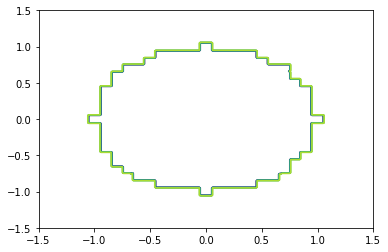

Above plot for K= 1


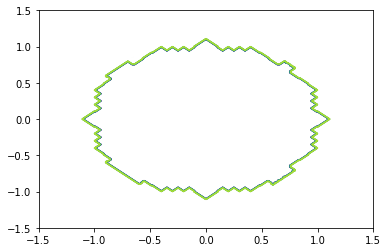

Above plot for K= 2


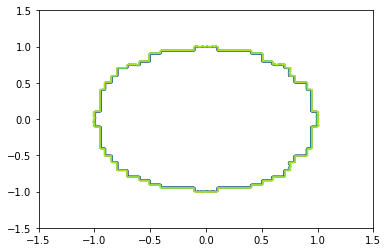

Above plot for K= 3


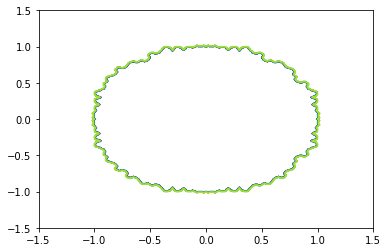

Above plot for K= 4


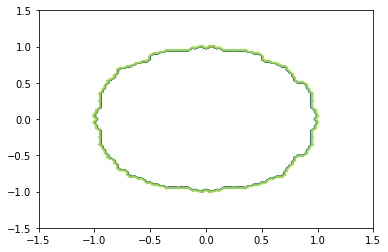

Above plot for K= 5


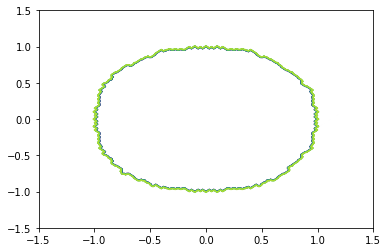

Above plot for K= 10


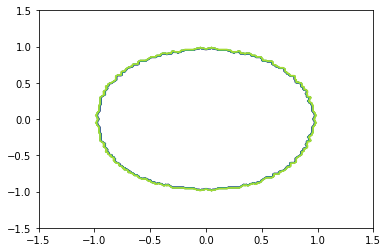

Above plot for K= 50


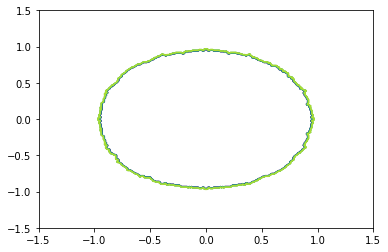

Above plot for K= 75


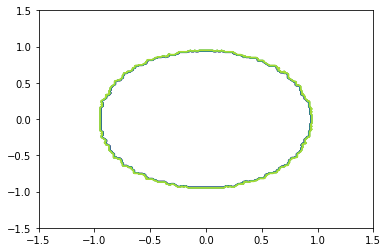

Above plot for K= 100


In [0]:
l=[1,2,3,4,5,10,50,75,100]
plot_for_k(l)

`After plotting for different values of K (1,3,5,10,50,100) we can conclude that, the curve becomes more smoother as we increase K value and the model becomes more generalized.`

d) Try another data set

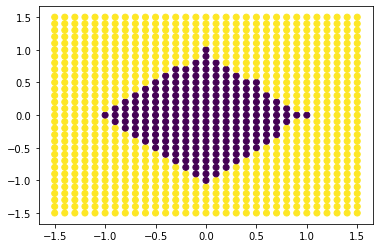

In [0]:
X,y=data_creation(-1.5,1.5,31,1)

Visualizing above generated dataset with different values of K

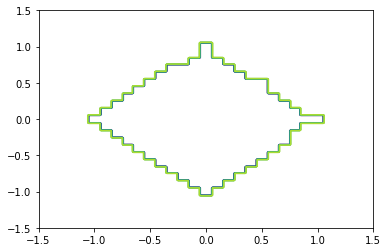

Above plot for K= 1


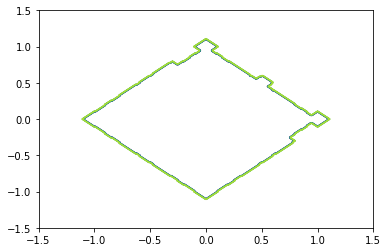

Above plot for K= 2


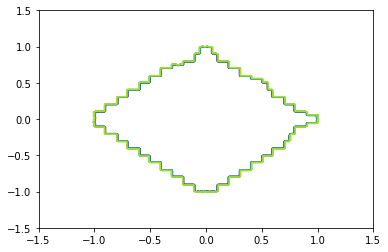

Above plot for K= 3


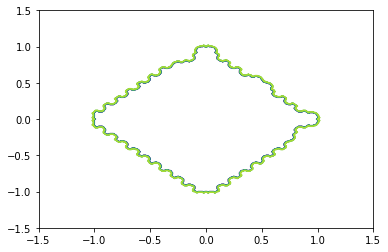

Above plot for K= 4


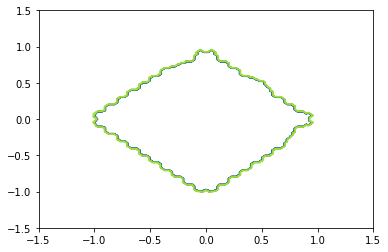

Above plot for K= 5


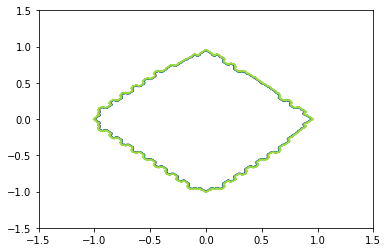

Above plot for K= 10


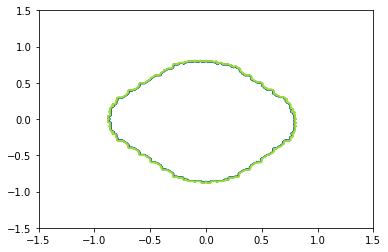

Above plot for K= 50


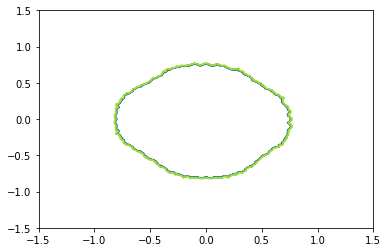

Above plot for K= 75


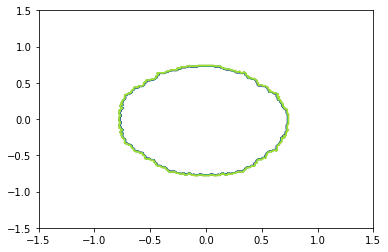

Above plot for K= 100


In [0]:
#creating object of class for above training data
myClassifier = KNN(k=1, num_classes=2)
some_train_data = X
some_train_labels = y
myClassifier.train(some_train_data, some_train_labels)

#plotting for different K
l=[1,2,3,4,5,10,50,75,100]
plot_for_k(l)   #function used above

`when plotting for small K, values are very discrete and the curve is not smooth. It looks like overfitting. when its increased too high, it becomes very much generalized which may further lead to underfitting. Hence, finding K, which doesnt lead to overfitting or underfitting should provide the best solution.`

e) Exploring it with different data sets i.e. changing the norm (0.8 and 0.4) and observing the changes

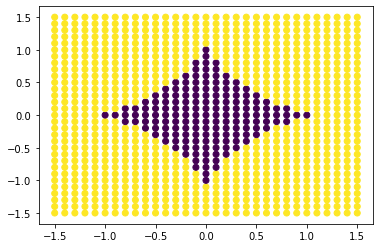

In [34]:
X,y=data_creation(-1.5,1.5,31,0.8)   #taking norm as 0.8

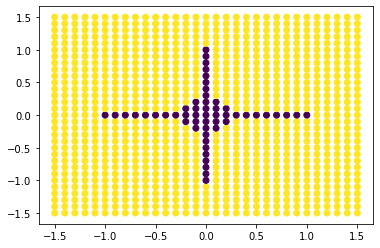

In [44]:
X,y=data_creation(-1.5,1.5,31,0.4)   #taking norm as 0.4

Plotting for different K values with norm = 0.4

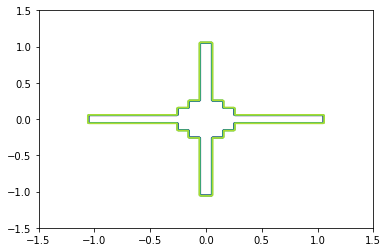

Above plot for K= 1
Accuracy:  1.0


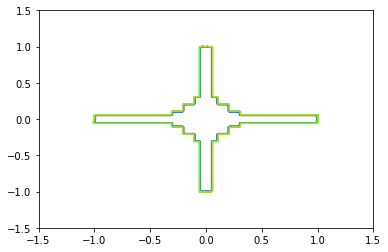

Above plot for K= 3
Accuracy:  0.9833506763787722


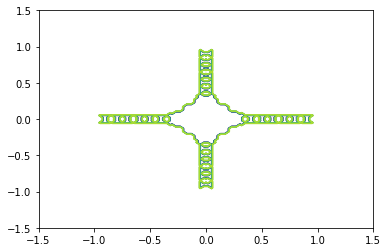

Above plot for K= 5
Accuracy:  0.9958376690946931


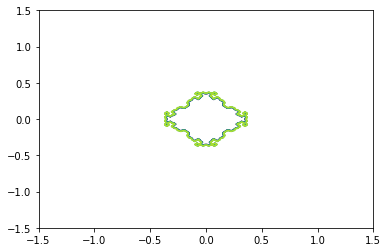

Above plot for K= 10
Accuracy:  0.9625390218522373


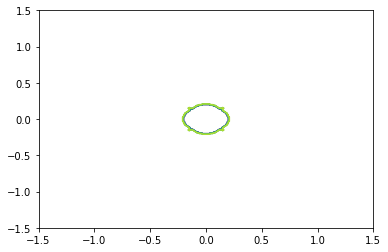

Above plot for K= 50
Accuracy:  0.9583766909469302


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: No contour levels were found within the data range.
  app.launch_new_instance()


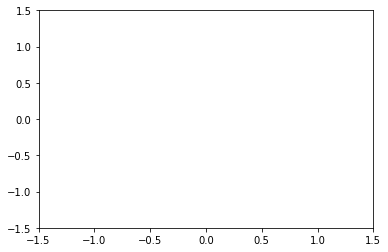

Above plot for K= 100
Accuracy:  0.9448491155046826


In [47]:
#creating object of class for above training data
myClassifier = KNN(k=1, num_classes=2)
some_train_data = X
some_train_labels = y
myClassifier.train(some_train_data, some_train_labels)


l=[1,3,5,10,50,100]  #plotting for different K
for i in l:
  myClassifier.set_k(i)
  predicted=myClassifier.predict(some_train_data)
  acc=myClassifier.accuracy(predicted,some_train_labels)
  plot_for_k([i])   #function used above
  print("Accuracy: ",acc)


Accuracy decreases with increasing K. When K = 100, decision boundary is invisible in the graph which means it has become very small.
While using euclidian distance, decision boundary never becomes invisible. Hence for limited number of features, euclidian distance can be a good choice than others in most of the data sets.

# **Q2 MNIST DATA**

`below code is for fetching MNIST data from drive. this is just for my usage.`

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


downloaded = drive.CreateFile({'id':'1PzGPanqXSdwsXebqaKbO7uaNQidNjsOK'}) 
downloaded.GetContentFile('mnist_train.csv')  

downloaded2 = drive.CreateFile({'id':'1i4ezuhBEc_VBEWnJ9WS7wQLGP-n-wYOL'}) 
downloaded2.GetContentFile('mnist_test.csv')

Reading MNIST files

In [0]:
import csv
import numpy as np
import time
import pandas as pd

#shuffling the data
def random(val):
    np.random.shuffle(val)
    return val

X=pd.read_csv('mnist_train.csv')
X=np.array(X)
X=random(X)
y = X[:,0]

val_X=pd.read_csv('mnist_test.csv')
val_X=np.array(val_X)
val_X=random(val_X)
val_y = val_X[:,0]

Running model and finding prediction and accuracy for a single K.

In [10]:
KNN_classifier=KNN(k=1,num_classes=10)
f=time.time()
KNN_classifier.train(X[:,1:],y[:])
predictions=KNN_classifier.predict(val_X[:,1:])
#print(predictions)
acc=KNN_classifier.accuracy(predictions,val_y)
c=time.time()
print('Accuracy: ',acc)
print('time taken: ',c-f)

Accuracy:  0.9690969096909691
time taken:  39.772056341171265


Hence we get ~96.9 accuracy with training data = 60000 and testing data = 10000 in 39 seconds.

a) Executing the same model on different K values and plotting graph of "accuracy" vs "K"

In [13]:
l=[1,2,3,4,5,10,50,75,100]
data=val_X[:,1:]
labels=val_y[:]

def plot_k_mnist(l,data,labels):
  k_val=[]
  accuracy=[]
  for i in l:
    KNN_classifier.set_k(i)
    pred=KNN_classifier.predict(data)
    acc=KNN_classifier.accuracy(pred,labels)
    accuracy.append(acc)
    k_val.append(KNN_classifier.get_k())
    print(acc,KNN_classifier.get_k())   # accuracy with K value
  return k_val,accuracy
k_val,accuracy=plot_k_mnist(l,data,labels)

0.9690969096909691 1
0.9626962696269626 2
0.9704970497049705 3
0.9681968196819682 4
0.9687968796879688 5
0.9664966496649665 10
0.9533953395339534 50
0.9473947394739474 75
0.943994399439944 100


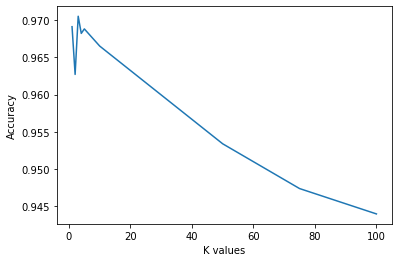

In [14]:
def plot(k_val,accuracy):
  plt.xlabel("K values")
  plt.ylabel("Accuracy")
  plt.plot(k_val,accuracy)
  plt.show()
plot(k_val,accuracy)

It can be concluded that our model works best for K=3 for MNIST dataset.

b) Now executing the model for different number of training data (from 100 to 60000) and plotting 'Accuracy' vs 'K'

In [50]:
def random_k(low,high):
    return np.random.randint(low=low,high=high,size=1)

train_set=[]
test_set=[]
accuracy=[]
KNN_classifier.set_k(3)
for i in range(0,5):
    
    X_new=X[0: random_k(100,X.shape[0])[0] ,:]
    KNN_classifier.train(X_new[:,1:],y[:])  #training on random number ofdata
    print("training data size:",X_new.shape)
    
    #prediction=KNN_classifier.predict(X_new[:,1:])
    #accuracy_train.append(KNN_classifier.accuracy(prediction,X_new[:,0]))
    
    val_X_new=val_X[0:random_k(100,10000)[0],:]      #random testing data
    print("testing data size:",val_X_new.shape)
    prediction=KNN_classifier.predict(val_X_new[:,1:])
    accuracy.append(KNN_classifier.accuracy(prediction,val_X_new[:,0]))
    
    train_set.append(X_new.shape[0])
    test_set.append(val_X_new.shape[0])

training data size: (20865, 785)
testing data size: (6908, 785)
training data size: (8642, 785)
testing data size: (5174, 785)
training data size: (27145, 785)
testing data size: (1365, 785)
training data size: (22989, 785)
testing data size: (6565, 785)
training data size: (28146, 785)
testing data size: (1689, 785)


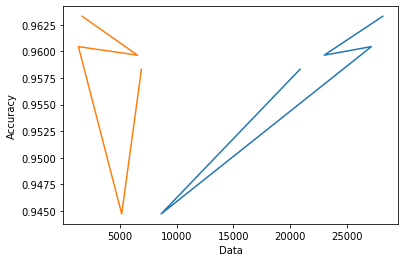

In [83]:
plt.xlabel("Data")
plt.ylabel("Accuracy")
plt.plot(train_set,accuracy)
plt.plot(test_set,accuracy)
plt.show()

This graph looks a bit tricky but looking at it carefully, cleared lot of things.  Here yellow line is testing set, blue line is training set.

1. Accuracy on training set increases with increase in training data.
2. Accuracy on testing set increases with increase in testing data.
3. If testing data is less, but training data is more, many times we get high accuracy as shown in graph.

In [0]:
def rescale_func(X):
    X=X.reshape(28,28)
    X=np.array(skimage.measure.block_reduce(X, (2,2), np.mean)).reshape(196)
    return X

c) Changing the resolution of the images and observing the changes

In [0]:
import skimage.measure

X=np.apply_along_axis(rescale_func,1,X[:,1:])
val_X=np.apply_along_axis(rescale_func,1,val_X[:,1:])

data=val_X[:,1:]
labels=val_y[:]
k_val=[]
accuracy=[]
KNN_classifier.train(X[:,1:],y[:])
k_val,accuracy=plot_k_mnist(l,data,labels)

plt.xlabel("K values")
plt.ylabel("Accuracy")
plt.plot(k_val,accuracy)
plt.show()


0.9716971697169717 1
0.9730973097309731 3


It can be concluded that, lowering the resolutions speeds up the algorithm and reduces the accuracy by ~ 2 %. this can also be noted that, at k = 1, the accuracy is highest when resolution is lowered. Whereas in case of the actual resolution, it reaches maximum at around k=3 and then drops down when k is increased further.

I have tried my image resolution with mean pooling, max pooling, basic resizing, downsampling. Mean pooling gave highest accuracy for this dataset.

# Q3- Curse of dimensionality

In [81]:
from scipy import integrate
import math

E_X1_int = integrate.dblquad(lambda x,y :(x-y)**2,0,1,0.0,1.0)
E_X2_int = integrate.dblquad(lambda x,y :((x-y)**2)**2,0,1,0.0,1.0)
E_X1=math.pow(E_X1_int[0],2)

print("E[X^2] : ",E_X1)
print("E[X]^2 : ",E_X2_int[0])
print("Variance: E[X1^2] - E[X1]^2 : ",E_X2_int[0] - E_X1)


E[X^2] :  0.027777777777777776
E[X]^2 :  0.06666666666666668
Variance: E[X1^2] - E[X1]^2 :  0.0388888888888889


When random value of X and Y sampled from uniform distribution over range [0,1], the Expected value and variance can be found by
<br>1. expected value = E[X]
<br>2. variance = E[X^2] - (E[X])^2
<br>3. probability function is 1/(b-1) where a and b is the range (0,1)
hence, function = 1
<br>4. integrating the function (X-Y)^2 over the range (0,1)
gives the value of E[X]
<br>5. integrating the value ((X-Y)^2)^2) which is (E[X]^2)^2 gives the second value.
<br>6. subtracting the second one from first one gives the variance.

In [82]:
from scipy import integrate


def function(X,Y,z=0,d=10):
    for i in range(0,d):
      z+=(X-Y)**2
    return z
    
d=10
E_X1_int = integrate.nquad(function,[[0,1],[0,1]])
E_X1_int = integrate.nquad(function,[[0,1],[0,1]])
print("D:",d)
print("E[X1^2]:",E_X1_int[0])
print("Variance: E[X1^2] - E[X1]^2 : ",E_X1_int[1])


D: 10
E[X1^2]: 1.6666666666666665
Variance: E[X1^2] - E[X1]^2 :  3.676688175074755e-14


For N dimensions, the expected value is N * E[X] of 1 dimension.

In [0]:
# Q4-Decision Tree Classifier 

In [0]:
from sklearn.tree import DecisionTreeClassifier

a) DecisionTreeClassifier on synthetic data already generated before.

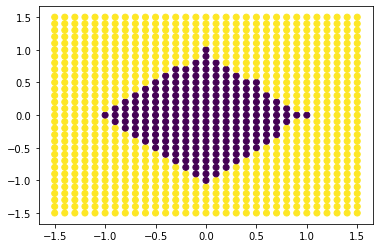

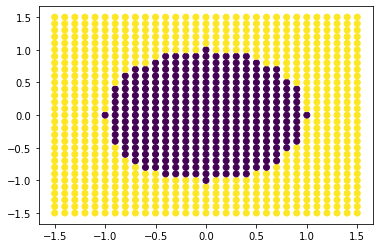

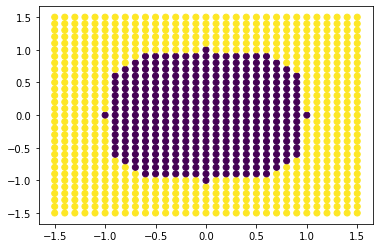

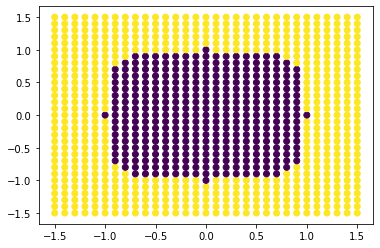

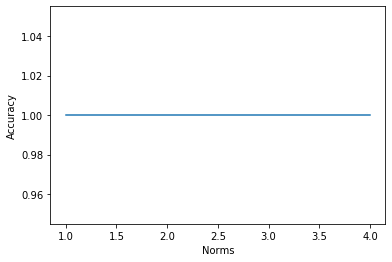

In [0]:
norm=[]
accuracy=[]
for i in range(1,5):    #for norms 1-5
    X,y=data_creation(-1.5,1.5,31,i)
    
    #classifier
    model = DecisionTreeClassifier()
    model.fit(X, y)
    train_predictions = model.predict(X)
    acc=model.score(X,y)
    
    norm.append(i)
    accuracy.append(acc)
plt.plot(norm,accuracy)  # plotting norms vs accuracy.
plt.xlabel('Norms')
plt.ylabel('Accuracy')
plt.show()

b) DecisionTreeClassifier on MNIST dataset

In [0]:
def train_test_split(data,k):
     np.random.shuffle(data)

     return data[0:k],X[0:k,0],data[k:],X[k:,0]

X=pd.read_csv('mnist_train.csv')
X=np.array(X)
y = X[:,0]
val_X=pd.read_csv('mnist_test.csv')
val_X=np.array(val_X)
val_y = val_X[:,0]

In [0]:

def classifier(train_X,train_y,test_X,test_y,validation_X,validation_y,depth,criterion):
    c=time.time()
    model = DecisionTreeClassifier(criterion=criterion,max_depth=depth)
    model.fit(train_X, train_y)

    train_predictions = model.predict(train_X)
    train_acc=model.score(train_X,train_y)

    test_predictions = model.predict(test_X)
    test_acc= model.score(test_X, test_y)

    validation_predictions = model.predict(validation_X)
    validation_acc = model.score(validation_X,validation_y)
    f=time.time()
    print("Training data: ",train_X.shape[0]," Validation data:",validation_X.shape[0]," Execution time: ",f-c,", Max-depth: ",depth,", Criterion: ",criterion)
    print("train_accuracy: ",train_acc," test_accuracy: ",test_acc," validation_accuracy: ",validation_acc)
    print()
    
for k in [30000,40000,50000]:         # different validation set values 
    for i in range(1,10,2):           # different max-depth values
        for j in ['gini','entropy']:  # different criterion
            train_X,train_y,validation_X,validation_y=train_test_split(X,k)
            #print(train_X.shape)
            #print(validatation_X.shape)
            classifier(train_X,train_y,val_X,val_y,validation_X,validation_y,i,j)


Training data:  30000  Validation data: 29999  Execution time:  2.0824341773986816 , Max-depth:  1 , Criterion:  gini
train_accuracy:  0.21606666666666666  test_accuracy:  0.21622162216221621  validation_accuracy:  0.21750725024167472

Training data:  30000  Validation data: 29999  Execution time:  2.156235694885254 , Max-depth:  1 , Criterion:  entropy
train_accuracy:  0.2151  test_accuracy:  0.21622162216221621  validation_accuracy:  0.21847394913163773

Training data:  30000  Validation data: 29999  Execution time:  3.442800998687744 , Max-depth:  3 , Criterion:  gini
train_accuracy:  0.6186666666666667  test_accuracy:  0.6193619361936193  validation_accuracy:  0.6136204540151339

Training data:  30000  Validation data: 29999  Execution time:  3.9265050888061523 , Max-depth:  3 , Criterion:  entropy
train_accuracy:  0.8111333333333334  test_accuracy:  0.8075807580758075  validation_accuracy:  0.8095936531217707

Training data:  30000  Validation data: 29999  Execution time:  4.63046

1. Criterion = entropy (which is for the information gain) performs better than when gini specified.
2. max-depth performs a major role as increasing it leads to 100% accuracy all the time. Increasing max-depth increases the execution time, hence choosing optimum value of it can be a better solution.
3. random_state is a parameter which can be impoortant sometimes. when random_state=0, it provides same output all the time. it can be used to train multiple trees in an ensemble learner to find the global optimal tree.
4. Accuracy of all the data sets reaches 100% at depth = 5, and remains consistent after it. Hence no other observations could be found from it, which can compare train,test,validation data.

In [86]:
print("Assignment 1 complete")

Assignment 1 complete
